In [2]:
%matplotlib inline
from scipy.io import loadmat
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [3]:
df = loadmat('ex3data1.mat')
df['X'].shape

(5000L, 400L)

In [4]:
weights = loadmat('ex3weights.mat')
weights.keys()

['Theta2', '__version__', '__header__', 'Theta1', '__globals__']

In [5]:
y = df['y']
X = np.c_[np.ones((df['X'].shape[0],1)), df['X']]

In [6]:
theta1, theta2 = weights['Theta1'], weights['Theta2']
print theta1.shape, theta2.shape

(25L, 401L) (10L, 26L)


(20L,)


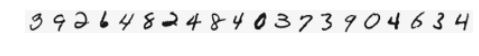

In [8]:
sample = np.random.choice(X.shape[0], 20)
print sample.shape
plt.imshow(X[sample,1:].reshape(-1,20).T)
plt.axis('off');

In [19]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [20]:
sigmoid(0)

0.5

In [21]:
from sklearn import linear_model
print X.shape

(5000L, 401L)


In [19]:
clf = linear_model.LogisticRegression()
clf.fit(X[:,1:],y.ravel())
from sklearn.metrics import accuracy_score
pred = clf.predict(X[:,1:])
print accuracy_score(pred,y.ravel())

5
8
4
6
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [23]:
def predict(theta_1, theta_2, features):
    z2 = theta_1.dot(features.T)
    a2 = np.c_[np.ones((df['X'].shape[0],1)), sigmoid(z2).T]
    
    z3 = a2.dot(theta_2.T)
    a3 = sigmoid(z3)
        
    return(np.argmax(a3, axis=1)+1) 

In [24]:
pred = predict(theta1, theta2, X)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))

Training set accuracy: 97.52 %


In [26]:
def lrcostfunc(thetha, x, y, reg):
    m = y.size
    h = sigmoid(x.dot(thetha))
    j = -1*(1./m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))+ (reg/(2*m))*np.sum(np.square(thetha[1:]))
    return j[0]


In [30]:
from scipy.optimize import minimize
def oneVsAll(features, classes, n_labels, reg):
    initial_theta = np.zeros((X.shape[1],1))  # 401x1
    all_theta = np.zeros((n_labels, X.shape[1])) #10x401

    for c in np.arange(1, n_labels+1):
        res = minimize(lrcostfunc(), initial_theta, args=(reg, features, (classes == c)*1), method=None,
                        options={'maxiter':50})
        all_theta[c-1] = res.x
    return(all_theta)

In [31]:
theta = oneVsAll(X, y, 10, 0.1)

NameError: global name 'lrcostfunc' is not defined